1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $f(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Quella che viene chiamata $f(t)$ nel secondo punto è una PDF mentre la prima altro non è che una CDF corrispondente alla probabilità che un nucleo decada entro un certo numero di secondi, funzione integrale del tempo $\int_{0}^{t}f(t) dt$. Ciò che ci interessa durante un decadimento NON è l'istante di tempo in cui guardiamo un determinato nucleo ma l'intervallo di tempo in cui il campione è preso in considerazione. Infatti come osserviamo dalla regola d'oro di Fermi: 
\begin{equation}
\frac{dN}{N}=-\lambda dt
\end{equation}
cioè il numero di nuclei che decadono rispetto al totale cioè la definizione frequentista di probabilità di decadimento di un nucleo (che corrisponde al limite di infinite ripetizioni dell'esperimento per ogni istante di tempo), è proporzionale all'intervallo di tempo $dt$ in cui si misura l'evento e non dal singolo momento (oggi o domani alle ore 12 o 13 sarà la stessa cosa se faccio l'esperimento per un $\Delta t= 10 s$)

In [32]:
import numpy as np
import pandas as pd
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

'%.4f'

Wall time: 193 ms


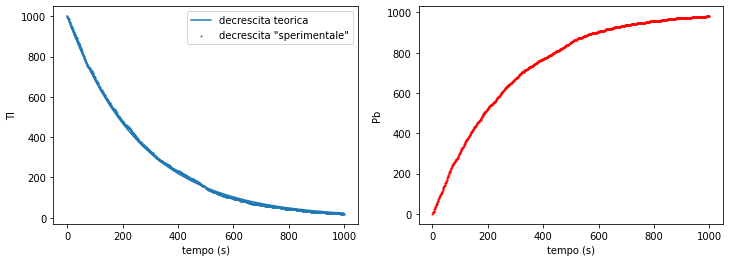

In [33]:
%%time
# Innanzitutto "a mano" considero l'evoluzione temporale del decadimento di tallio in piombo. Sappiamo che il tempo di dimezzamento del tallio è di 3.052 minuti mentre tau è il tempo di vita media = (t_1/2)/log2

def p(t, tau) :
    return 1-2**(-t/tau)
# supponiamo di considerare un tempo di circa 1000 seocondi in modo da poter osservare il decadimento del radionuclide visto il suo tempo di dimezzamento di circa tre minuti. Sia dt lo step temporale di un secondo tra un controllo e il successivo nel conteggio di quanti nuclei sono decaduti e quanti rimasti. Supponiamo inoltre di avere inizialmente 1000 atomi di Tl e 0 di Pb.

tau = 3.052*60/np.log(2)
tl = 1000
pb = 0
tlist = []
pblist = []
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].set_xlabel('tempo (s)')
ax[0].set_ylabel('Tl')
ax[1].set_xlabel('tempo (s)')
ax[1].set_ylabel('Pb')
# c'è un problema legato alla provenienza di questa funzione p(t). Perchè non riesco a trovare il punto di contatto tra la definizione "locale" di probabilità di decadimento ovvero in un istante di tempo ben preciso per UN NUCLEO e invece la definizione frequentista sempre fissando il tempo come numero di nuclei decaduti rispetto al totale disponibili. La prima dovrebbe essere data da una distribuzione di Bernoulli (che non so come applicare in questo caso, scoperto vedi https://physics.stackexchange.com/questions/229632/calculate-the-probability-that-a-radioactive-nucleus-will-have-decayed-after-the) la seconda invece tramite la funzione cumulativa di probabilità ottenuta a partire dalla regola d'oro di Fermi che definisce una distribuzione di probabilità
for i in range(1000) : 
# accept and reject method infatti quando il valore estratto è minore della probabilità che un nucleo decada allora il nucleo che stiamo considerando decade e viene sottratto dal totale di quelli disponibili fino a quel momento. Tuttavia in questo caso la probabilità  CDF p(t) non risulta avere nessuna utilità in quanto sto analizzando secondo per secondo quale sia la probabilità che il nucleo decada e non da zero fino all'istante di tempo in cui mi trovo per ogni iterazione. Segue che alla fine come probabilità per ogni iterazione e per ogni nucleo dentro ciascun iterazione userò 1/tau (ovvero un secondo per 1/tau che è adimensionale)
    tlist.append(tl)
    pblist.append(pb)
    for j in range(tlist[i]) :
        if 1/tau > np.random.rand() :
            tl -= 1
            pb += 1
        else : tl = tl
ax[0].scatter(range(1000),tlist, label='decrescita "sperimentale"', s=1)
ax[0].plot(range(1000), 1000*np.exp(-np.arange(1000)/tau), label='decrescita teorica') 
ax[1].scatter(range(1000),pblist, s=1, c='red')
leg = ax[0].legend()
# questa è l'evoluzione temporale del numero di nuclei che rimangono per ogni secondo

Adesso bisogna rifare lo stesso procedimento tramite l'inverse transform method a partire dalla distribuzione di probabilità dei nuclei decaduti nel tempo. Cerco di invertire la funzione f(t) innanzitutto considerando una variabile random estratta tra zero e uno. Pongo 
\begin{equation}
z = \int_{-\infty}^{t} f(t) dt = 1-2^{-t/\tau}
\end{equation}
In modo che, se siamo in grado di calcolare l'integrale (cioè la CDF) e di riscrivere il risultato per t otteniamo i tempi di decadimento dei 1000 atomi di Tl. Ottenuti i tempi a cui si prevede possano decadere i mille nuclei vediamo di creare una lista contenente in ordine tali tempi e scorrendo sul range che va da zero al massimo dei tempi che estraiamo sottraiamo ad ogni istante di tempo da mille il numero di nuclei che sono decaduti rappresentando il risultato in funzione di tale range.
\begin{equation}
t=-\tau \frac{\log(1-z)}{\log(2)} 
\end{equation}


Wall time: 16.9 ms


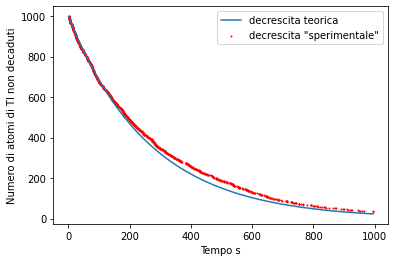

In [34]:
%%time
def time(z,tau):
    return -tau*np.log(1-z)
tau = 3.052*60/np.log(2)
z = np.random.uniform(0,1,size=1000)
t = np.sort(time(z,tau))
# Con t indichiamo il tempo di decadimento dei nuclei dal primo che decade all'ultimo
#  
res = [1000]
for i in range(len(t)):
    res.append(res[i] - 1)
    # devo eliminare il primo elemento dalla lista per matchare la dimensione dei due array 
res.remove(1000)
# dell'array dei nuclei residui elimino i valori corrispondenti ad un tempo superiore a mille, quindi per semplicità agisco prima sull'array dei tempi tramite slice indexing e poi utilizzo il numero di valori dentro il nuovo array per gestire le componenti di res
t = t[t<1000]
plt.scatter(t,res[:len(t)], s=1, c='red', label='decrescita "sperimentale"', )
plt.xlabel('Tempo s')
plt.ylabel('Numero di atomi di Tl non decaduti')
plt.plot(t, 1000*np.exp(-t/tau), label='decrescita teorica')
plt.legend()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

La richiesta che l'angolo di scattering sia maggiore di $\pi/2$ si riflette su una condizione sul parametro di impatto b:
\begin{equation}
\theta > \frac{\pi}{2} \rightarrow \frac{\theta}{2} > \frac{\pi}{4}  \\ \\
\tan\left(\frac{\theta}{2}\right) > \tan\left(\frac{\pi}{4}\right) = 1
\end{equation}
ed essendo 
\begin{equation}
\tan\left(\frac{\theta}{2}\right) = \frac{Ze^2}{2\pi\epsilon_0 E b}
\end{equation}
segue che 
\begin{equation}
\frac{Ze^2}{2\pi\epsilon_0 E b} > 1 \Longleftrightarrow b< \frac{Ze^2}{2\pi\epsilon_0 E}
\end{equation}

In [35]:
from scipy import constants
n = 1000000
Z = 79
e = constants.physical_constants['atomic unit of charge'][0]
E = 7.7e6*e
eps = constants.epsilon_0
a = constants.physical_constants['atomic unit of length'][0]
sg = (a/100)**2
condb = (Z*e**2)/(2*np.pi*eps*E)

# genero dei punti (x,y) normalmente distribuiti con sigma=sg e valor medio = 0
cov = np.diag([sg,sg])
point = np.random.multivariate_normal([0,0], cov, n)
#plt.scatter(point[:,0],point[:,1], s=5)
#plt.gca().set_aspect('equal', adjustable='box') 

count = 0
for couple in point :
    if np.sqrt(couple[0]**2 + couple[1]**2) < condb : 
# in questo modo confronto il parametro di impatto sperimentale con quello teorico provvisto dalla condizione di scattering 
        count += 1
        #plt.scatter(couple[0],couple[1], c='red', s=5)
print("la frazione di particelle backscattered vale circa:", count/n)

la frazione di particelle backscattered vale circa: 0.001589


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

l'integrale vale 1.452194


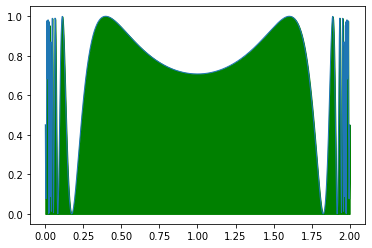

In [36]:
# prima di tutto calcolo l'integral con il metodo accept and reject 
def f(x):
    return (np.sin(1/(x*(2-x))))**2

def count(N):
    count=0
    for i in range(N):
        xi = 2*np.random.random()
        yi = np.random.random()
        if yi < f(xi): count+=1
    return count 

x = np.linspace(0.001,1.999,1000) # perchè la funzione f non è definita in zero e due 
plt.plot(x,f(x), linewidth=1)
# coloro l'area che desidero calcolare
plt.fill_between(x,f(x), color='g') 
# conto quanti punti rientrano nell'area sottesa alla funzione f 
N = 1000000
I=2*count(N)/N
# l'area del rettangolo vale 2*1=2
# per stimare l'errore dell'integrazione montecarlo considero il metodo trapz che sempre numericamente calcola l'integrale della funzione f in [0,2]
I_trapz = np.trapz(f(x),x)
print("l'integrale vale", I)
err = np.abs(I-I_trapz)
# inoltre essendo il metodo MC funzione del numero di samples che stiamo utilizzando e del numero di volte che si esegue posso calcolare la deviazione standard in un numero fissato di ripetizioni del risultato dell'integrale 
mc = []
ex = 5
for j in range(ex): # ad esempio 100 iterazioni
    mc.append(2*count(N)/N)
# potrei calcolare la deviazione standard degli elementi contenuti in mc oppure semplicemente confrontare un unico risultato di MC con l'integrale di trapz

Nella cella successiva, il primo errore è intrinseco nella randomicità del metodo montecarlo e non confronta il risultato con nessun valore dell'integrale. Il secondo invece confronta il valore ottenuto tramite mc con quello del metodo trapz di numpy, che calcola sempre numericamente l'integrale della funzione $f(x)$.
Entrambi dovrebbero essere usati per valutare la bontà del metodo Monte Carlo.

In [37]:
print("errore su MC eseguendo l'algoritmo %i volte vale" % 5, np.std(mc))
print("errore su MC confrontandolo con il metodo trapz vale", err)

errore su MC eseguendo l'algoritmo 5 volte vale 0.0003380546701348765
errore su MC confrontandolo con il metodo trapz vale 0.00142927743043475


In [38]:
# adesso utilizzo il metodo mean value, faccio un sample randomico di punti nel dominio di integrazione [0,2] esclusi gli estremi e associo a ciascuno di questi punti il valore della funzione f(xi). L'integrale sarà approssimativamente uguale alla somma di tutti questi f(xi) per l'ampiezza dell'intervallo di integrazione diviso il numero di samples
#xrand = np.random.uniform(0.001,2, size=N) 
# l'intervallo in cui la funzione genera numeri random è [0,2), quindi solo il due è escluso 
# oppure posso scrivere 
while not 0 in np.random.uniform(0.001,2, size=N):
    xrand=np.random.uniform(0.001,2, size=N)
    break
yrand = f(xrand)
I_mean = np.sum(yrand)*2/N
print("l'integrale calcolato tramite il metodo mean value è:",I_mean)

l'integrale calcolato tramite il metodo mean value è: 1.4522378637493165


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



l'area del cerchio è circa 3.24


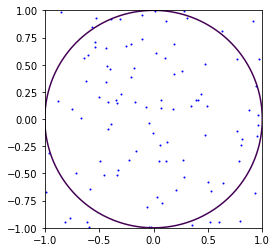

In [39]:
# genero numeri random nel quadrato di lati [0,1]x[0,1] tramite una lista di tuples
def circle(x,y):
    return 
p = [(np.random.uniform(-1,1),np.random.uniform(-1,1)) for i in range(100)]
# adesso posso confrontare così come ho fatto nell'esercizio precedente il valore di una funzione applicata ai numeri estratti random con la condizione x^2+y^2 <= 1
counts = 0
for i in p :
    if i[0]**2+i[1]**2 <= 1 :
        counts += 1
    plt.scatter(i[0], i[1], c='b', s=1)
area = 4*counts/len(p)
print("l'area del cerchio è circa", area)
x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - 1
plt.contour(X,Y,F,[0], c='r')
plt.gca().set_aspect('equal', adjustable='box') # in modo da vedere un plot quadrato anzichè le scale su x e y adattate alla dimensione della figure 

In [40]:
# adesso generalizzo il procedimento per 10D  
randnum = np.random.uniform(-1,1, size=(1000000,10)) 
# posso considerare ogni riga come un punto in 10D per un totale di N (100) righe quanti sono i samples che vogliamo estrarre randomicamente 
squared = randnum*randnum
count1 = 0
for i in squared :
    if np.sum(i) <= 1 :
        count1 += 1
area1 = (2**10)*count1/np.shape(randnum)[0]
print("il volume di una ipersfera in 10D vale circa:", area1)

il volume di una ipersfera in 10D vale circa: 2.561024


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

l'area sottesa da h(x) vale circa: 0.84986510541186


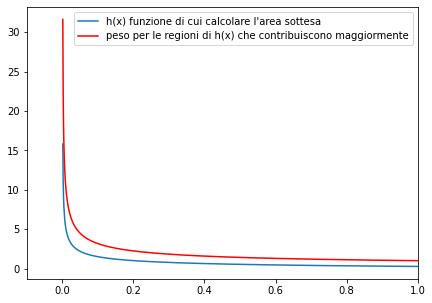

In [41]:
# l'integrale della funzione w nell'intervallo [0,1] vale 2 
def w(x): 
    return 1/np.sqrt(x)
def h(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))
# le x devono essere estratte proprio dalla distribuzione di probabilità w(x) che pesa poi i valori di h(xi) quando calcolo l'integrale con l'approssimazione di mean value
z =  np.random.uniform(0,1, 1000)
its = lambda z: (z*z)
# bisogna stare attenti a quando si applica il mapping da z generato nell'intervallo [0,1] a x in quanto è possibile che il range di integrazione cambi. In questo caso, dunque, per ristabilire il giusto range moltiplico per  quattro la funzione its così da avere soltanto z*z e x in [0,1]
x = its(z)
# utilizzo l'inverse transform sampling sulla funzione 1/sqrt(x)
wsampl = w(x) 
hsampl = h(x)
I_is = 2*np.sum(hsampl/wsampl)/1000
xplot = np.linspace(0.001,1,1000)
plt.plot(xplot, h(xplot), label="h(x) funzione di cui calcolare l'area sottesa")
plt.plot(xplot,w(xplot), c='red',label='peso per le regioni di h(x) che contribuiscono maggiormente')
plt.xlim(-0.1,1)
plt.gcf().set_size_inches(7,5)
plt.legend()
print("l'area sottesa da h(x) vale circa:", I_is)